The main categories of machine learning are:
  - 1) Supervised learning 
  - 2) Unsupervised learning


Regression and classification. These are both types of supervised machine learning. In supervised learning, we can train an algorithm to predict an unknown variable from known variables.

In unsupervised learning we're finding patterns in data.One of the main unsupervised learning techniques is called clustering. We use clustering when we're trying to explore a dataset, and understand the connections between the various rows and columns. Clustering algorithms group similar rows together. There can be one or more groups in the data, and these groups form the clusters.

Going to work on clustering US Senators based on how they voted.

In the United States there are two main political parties 1)Democrats 2) Repbulicans, the senates votes on proposed legislation.The bill has to be voted on by both houses of Congress,A majority vote is required to get a bill passed.Senators typically vote in accordance with how their political party votes, known as voting along party lines. Clustering voting data of Senators is particularly interesting because it can expose patterns that go deeper than party affiliation.some senators choose to  unaffiliated with a party,and votes independent

In [22]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
votes =pd.read_csv("114_congress.csv")
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
votes.info()
votes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
name     100 non-null object
party    100 non-null object
state    100 non-null object
00001    100 non-null float64
00004    100 non-null float64
00005    100 non-null float64
00006    100 non-null float64
00007    100 non-null float64
00008    100 non-null float64
00009    100 non-null float64
00010    100 non-null float64
00020    100 non-null float64
00026    100 non-null float64
00032    100 non-null float64
00038    100 non-null float64
00039    100 non-null float64
00044    100 non-null float64
00047    100 non-null float64
dtypes: float64(15), object(3)
memory usage: 14.1+ KB


(100, 18)

In [3]:
print(votes['party'].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


We can find theho similar the senator's votes are by using the euclidean distance we can find the distance between two rows:
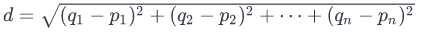

By using the euclidean_distances() method in the scikit-learn library, we can calculate the distance between the first row and the second row.

In [26]:
print(euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[1,3:].values.reshape(1, -1)))
distances =print(euclidean_distances(votes.iloc[0,3:].values.reshape(1,-1),
votes.iloc[2,3:].values.reshape(1,-1)))

[[1.73205081]]
[[3.31662479]]


#### K-means algorithm

k-means algorithm will split the data in to clusters,  k-means clustering uses euclidean distances to form clusters of similar rows.

Here in US senators dataset the k-mean algorithm will split the data into clusters, will group Senators who vote similarly on bills together, in clusters, Each cluster is assigned a center and the euclidean distance from each Senator to the center is computed. Senators are assigned to clusters based on which one they are closest to

Here  [KMeans ](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_transform)class from scikit-learn to perform the clustering

    

KMeans(n_clusters=2, random_state=1) 

 - n_clusters=2 : means here in the dataset the senators are fromtwo parties one is Republicans and Democrats, so  we need to form to clusters
 - random_state = 1 when we set to 1 we can generate same sample whenever we're running
 
- fit_transform() method will fit the votes and calculate the distance of each row to each clusters, Here in this dataset it will calculate the distance of each sentors to each clusters.


 

In [16]:
kmean_model= KMeans(n_clusters=2,random_state=1)
model_transform= kmean_model.fit_transform(votes.iloc[:,3:])
model_transform

array([[3.12141628, 1.3134775 ],
       [2.6146248 , 2.05339992],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [1.43833966, 2.96866004],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.33960656, 3.41651746],
       [3.42004795, 0.24198446],
       [0.31287498, 3.30758755],
       [0.33960656, 3.41651746],
       [3.27058526, 0.96734144],
       [0.33960656, 3.41651746],
       [3.34875646, 0.53945585],
       [0.33960656, 3.41651746],
       [1.18084816, 3.12695614],
       [1.23852221, 3.13536063],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [2.6146248 , 2.05339992],
       [0.58487332, 3.31421108],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.42004795, 0.24198446],
       [3.56324683, 0.93036231],
       [3.42004795, 0.24198446],
       [1.73847904, 2.82326711],
       [0.33960656, 3.41651746],
       [3.

The result above is NumPy array with two columns.The first column is the Euclidean distance from each Senator to the first cluster, and the second column is the Euclidean distance to the the second cluster. The values in the columns will indicate how "far" the Senator is from each cluster. The further away from the cluster, the less the Senator's voting history aligns with the voting history of the cluster.

In [18]:
labels=kmean_model.labels_
print(pd.crosstab(labels, votes['party']))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [20]:
democratic_outliers =  votes[(labels==1)&(votes['party']=="D")]
print(democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


In [19]:
votes[(labels == 0) & (votes["party"] == "I")]

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
50,King,I,ME,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
79,Sanders,I,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


#### Plotting out the clusters

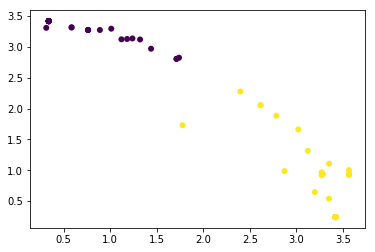

In [28]:
plt.scatter(x=model_transform[:,0], y=model_transform[:,1], c=labels, linewidths=0)
plt.show()